In [1]:
import numpy as np
import pandas as pd
import sklearn
import warnings
warnings.filterwarnings('ignore')

<h3 style = 'color : #6DE1D2'> 1. Data cleaning </h3>
<h3 style = 'color : #FFD63A'> 2. EDA </h3>
<h3 style = 'color : #8F87F1'> 3. Text Preprocessing </h3>
<h3 style = 'color : #5CB338'> 4. Model Building </h3>
<h3 style = 'color : #F75A5A'> 5. Evaluation </h3>

In [4]:
df = pd.read_csv('balanced_train.csv')
df.head()

,target,text
0,spam,"Hi there, Claim your free gift card now! Visit..."
1,spam,"Dear user, Your account has been credited. Ver..."
2,spam,Good news! Congratulations! You've been select...
3,spam,"Attention, Win a brand new iPhone! Click now! ..."
4,ham,"Tonight? Yeah, I'd be down for that"


In [ ]:
df1 = pd.read_csv('spam.csv')

<h1 style = 'color : #6DE1D2'> 1. Data Cleaning </h1>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9572 entries, 0 to 9571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  9572 non-null   object
 1   text    9572 non-null   object
dtypes: object(2)
memory usage: 149.7+ KB


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [13]:
# missing values

df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
df.duplicated().sum()

699

In [17]:
df = df.drop_duplicates(keep = 'first')

In [19]:
df.shape

(8873, 2)

<h1 style = 'color : #FFD63A'> 2. EDA </h1>

In [22]:
df['target'].value_counts()

target
0    4516
1    4357
Name: count, dtype: int64

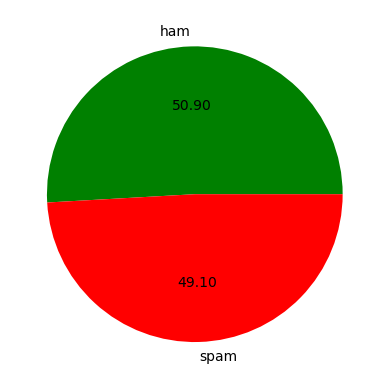

In [24]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels = ['ham','spam'], autopct = '%0.2f', colors = 'gr')
plt.show()

In [25]:
import nltk

In [27]:
df['num_characters'] = df['text'].apply(len)

In [28]:
# num of characters

df.sample(5)

,target,text,num_characters
7205,0,"I'll see if I can swing by in a bit, got some ...",79
3367,0,Tmr then Ì_ brin lar... Aiya later i come n c ...,109
6052,0,"hey, looks like I was wrong and one of the kap...",133
6045,1,"Hi there, Hurry up! Limited time offer. Confir...",91
7612,1,"Dear user, Claim your free gift card now! Repl...",97


In [32]:
df['num_words'] = df['text'].apply((lambda x: len(nltk.word_tokenize(x))))

In [33]:
# num of words

df.sample(5)

,target,text,num_characters,num_words
39,1,"Hi there, Low interest rates available today! ...",107,22
1816,1,"Hi there, You've won a lottery worth $5000! Ve...",103,24
259,0,"Ok., is any problem to u frm him? Wats matter?",46,13
5501,0,"Yup, leaving right now, be back soon",36,9
5031,1,Good news! Exclusive offer just for you! Compl...,93,18


In [34]:
# num of sentences

df['num_sentences'] = df['text'].apply((lambda x: len(nltk.sent_tokenize(x))))

In [37]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,1,"Hi there, Claim your free gift card now! Visit...",95,20,3
1,1,"Dear user, Your account has been credited. Ver...",112,24,4
2,1,Good news! Congratulations! You've been select...,132,27,5
3,1,"Attention, Win a brand new iPhone! Click now! ...",108,25,4
4,0,"Tonight? Yeah, I'd be down for that",35,10,2


In [40]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

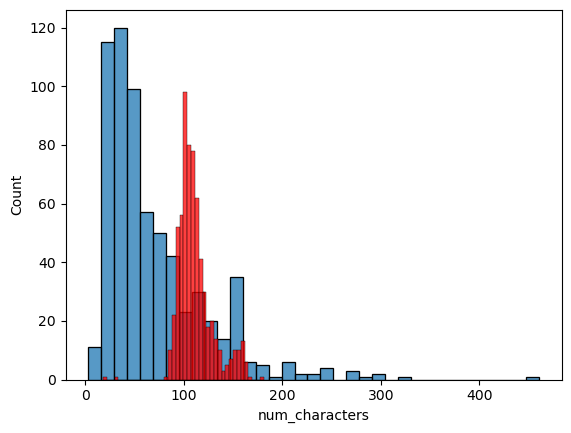

In [42]:
sns.histplot(df[df['target'] ==0]['num_characters'].sample(650))
sns.histplot(df[df['target'] ==1]['num_characters'].sample(650), color= 'red')

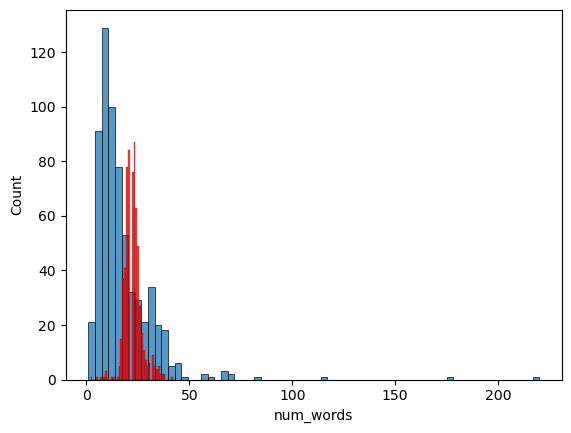

In [44]:
sns.histplot(df[df['target'] ==0]['num_words'].sample(650))
sns.histplot(df[df['target'] ==1]['num_words'].sample(650), color= 'red')
plt.show()

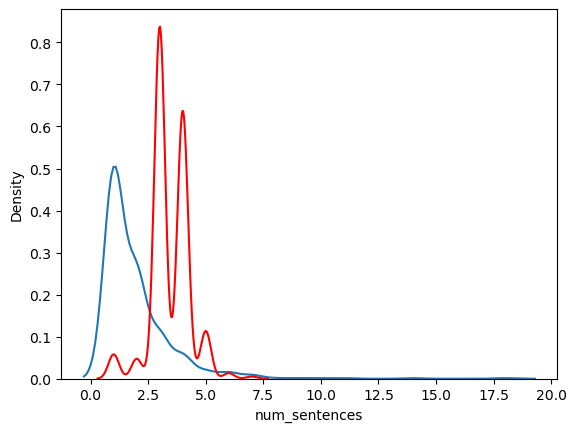

In [46]:
sns.kdeplot(df[df['target'] ==0]['num_sentences'].sample(650))
sns.kdeplot(df[df['target'] ==1]['num_sentences'].sample(650), color= 'red')
plt.show()

## Generally no. of sentences, words, characters are comparatively more in Spam messages than Ham

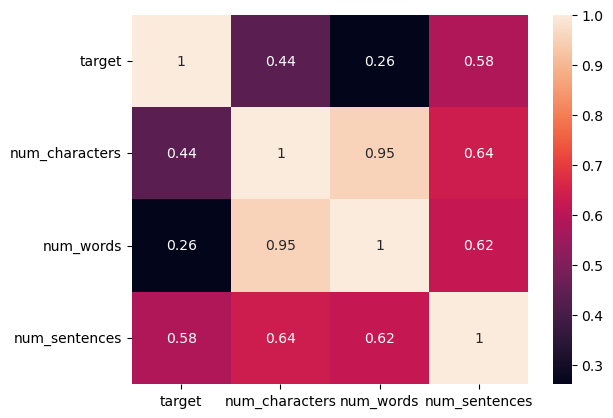

In [49]:
sns.heatmap(df.corr(numeric_only = True), annot = True )
plt.show()

## Here we can see there is correlation between spam message and no. of sentences and characters


<h1 style = 'color : #8F87F1'> 3. Text Preprocessing </h1>

- Lower case </br>
- Tokenization </br>
- Removing special characters </br>
- Removing stop words and punctuation</br>
- Stemming

In [53]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [55]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [57]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [59]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
 
    y = [i for i in text if i.isalnum()]
    
    y = [i for i in y if i not in stopwords.words('english') and i not in string.punctuation] 

    y = [ps.stem(i) for i in y]
    
    return " ".join(y)

    

In [61]:
df['transformed_text'] = df['text'].apply(transform_text)

In [62]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,1,"Hi there, Claim your free gift card now! Visit...",95,20,3,hi claim free gift card visit site limit spot
1,1,"Dear user, Your account has been credited. Ver...",112,24,4,dear user account credit verifi sign hour left
2,1,Good news! Congratulations! You've been select...,132,27,5,good news congratul select cash prize regist t...
3,1,"Attention, Win a brand new iPhone! Click now! ...",108,25,4,attent win brand new iphon click sign act fast...
4,0,"Tonight? Yeah, I'd be down for that",35,10,2,tonight yeah


<h1 style = 'color : #FF9BD2'> Interesting insights form data </h1>

In [66]:
from wordcloud import WordCloud

wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'black')

In [68]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = ' '))

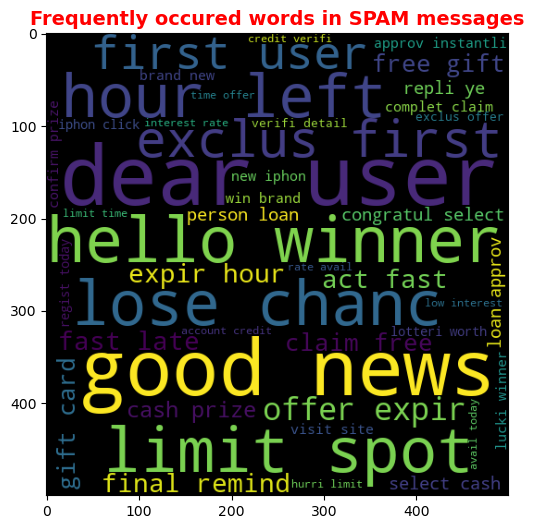

In [70]:
plt.figure(figsize=(150,6))
plt.imshow(spam_wc)
fontdict = {'fontsize': 14,
        'fontweight': 800,
        'color': 'red'}
plt.title('Frequently occured words in SPAM messages',fontdict)
plt.show()

In [72]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = ' '))

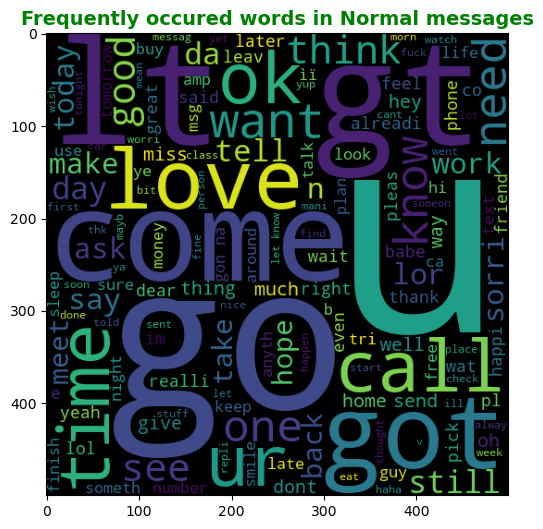

In [73]:
plt.figure(figsize = (150, 6))
plt.imshow(ham_wc)
fontdict = {'fontsize': 14,
        'fontweight': 800,
        'color': 'green'}
plt.title('Frequently occured words in Normal messages',fontdict)
plt.show()

In [76]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [78]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('offer', 1262),
 ('user', 1192),
 ('hour', 1045),
 ('congratul', 995),
 ('winner', 961),
 ('claim', 909),
 ('limit', 903),
 ('exclus', 881),
 ('prize', 840),
 ('today', 736),
 ('click', 730),
 ('verifi', 717),
 ('dear', 678),
 ('hi', 670),
 ('call', 658),
 ('attent', 629),
 ('free', 617),
 ('good', 597),
 ('news', 593),
 ('hello', 586),
 ('chanc', 577),
 ('lose', 556),
 ('spot', 552),
 ('expir', 536),
 ('100', 536),
 ('final', 530),
 ('first', 528),
 ('left', 523),
 ('24', 521),
 ('fast', 519)]

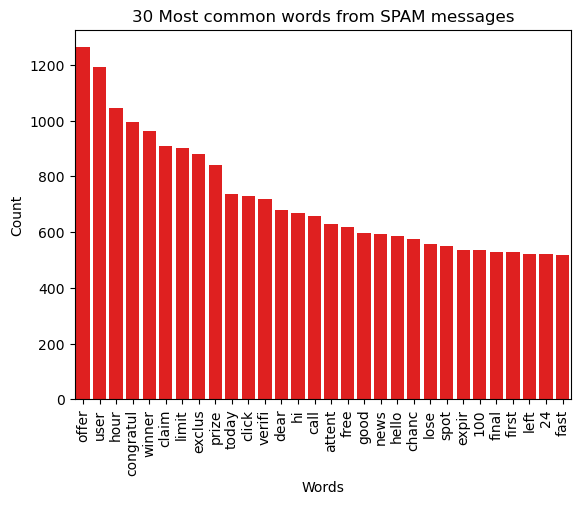

In [80]:
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1], color = 'r')
plt.xticks(rotation = 'vertical')
plt.title('30 Most common words from SPAM messages')
plt.xlabel('Words')
plt.ylabel('Count')
plt.show()

In [82]:
ham_corpus = [word for msg in df[df['target'] == 0]['transformed_text'].tolist()  for word in msg.split()]

In [84]:
Counter(ham_corpus).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('know', 236),
 ('got', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

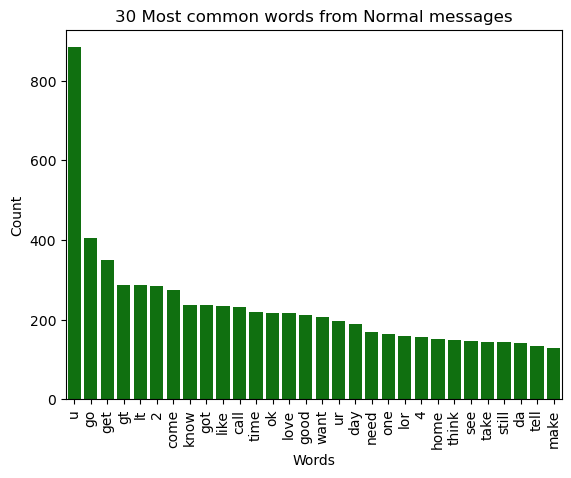

In [86]:
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1], color = 'green')
plt.xticks(rotation = 'vertical')
plt.title('30 Most common words from Normal messages')
plt.xlabel('Words')
plt.ylabel('Count')
plt.show()


<h1 style = 'color : #5CB338'> 4. Model Building </h1>


In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [95]:
X = df['transformed_text']
y = df['target']
tfidf = TfidfVectorizer(max_df = 0.95, min_df = 3, max_features = 5000, sublinear_tf=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 2)

In [97]:
X_train = tfidf.fit_transform(X_train).toarray()
X_test = tfidf.transform(X_test).toarray()

In [99]:
X_train.shape

(7098, 1820)

In [101]:
y = df['target'].values

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [105]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
bnb = BernoulliNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [107]:
clfs = {
    'Support Vector Classifier' : svc,
    'K-Neighbors Classifier' : knc, 
    'Multinomial Naive Bayes': mnb, 
    'Bernoulli Naive Bayes': bnb, 
    'Decision Tree Classifier': dtc, 
    'Logistic Regression': lrc, 
    'Random Forest Classifier': rfc, 
    'AdaBoost Classifier': abc, 
    'Bagging Classifier': bc, 
    'Extra Trees Classifier': etc,
    'Gradient Boosting Classifier':gbdt,
    'XGBoost Classifier':xgb
}


In [109]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [111]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  Support Vector Classifier
Accuracy -  0.9814084507042253
Precision -  0.9883585564610011
For  K-Neighbors Classifier
Accuracy -  0.9504225352112676
Precision -  0.9987277353689568
For  Multinomial Naive Bayes
Accuracy -  0.9684507042253521
Precision -  0.9822695035460993
For  Bernoulli Naive Bayes
Accuracy -  0.9774647887323944
Precision -  0.9964200477326969
For  Decision Tree Classifier
Accuracy -  0.8839436619718309
Precision -  0.9955357142857143
For  Logistic Regression
Accuracy -  0.9740845070422535
Precision -  0.9858823529411764
For  Random Forest Classifier
Accuracy -  0.9859154929577465
Precision -  0.9964830011723329
For  AdaBoost Classifier
Accuracy -  0.9769014084507043
Precision -  0.9859649122807017
For  Bagging Classifier
Accuracy -  0.9757746478873239
Precision -  0.9825378346915018
For  Extra Trees Classifier
Accuracy -  0.9887323943661972
Precision -  1.0
For  Gradient Boosting Classifier
Accuracy -  0.96
Precision -  0.9987546699875467
For  XGBoost Classifier
A


<h1 style = 'color : #F75A5A'> 5. Evaluation </h1>

In [113]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [115]:
performance_df

,Algorithm,Accuracy,Precision
9,Extra Trees Classifier,0.988732,1.000000
10,Gradient Boosting Classifier,0.960000,0.998755
1,K-Neighbors Classifier,0.950423,0.998728
6,Random Forest Classifier,0.985915,0.996483
3,Bernoulli Naive Bayes,0.977465,0.996420
4,Decision Tree Classifier,0.883944,0.995536
11,XGBoost Classifier,0.980845,0.992941
0,Support Vector Classifier,0.981408,0.988359
7,AdaBoost Classifier,0.976901,0.985965
5,Logistic Regression,0.974085,0.985882



<h1 style = 'color: orange'>We are focusing on how we can reduce the 'False Positive' Errors, we will choose the model with higher <b style = 'color : red'>PRECISION</b> along with high Accuracy.</h1>


## Why Focus on Precision for Spam Detection?

- In a spam classification system, a False Positive (ham incorrectly classified as spam) is more harmful than a False Negative.

- Ham messages are often important or urgent; falsely marking them as spam could lead to missed information, user frustration, and trust issues.

- Precision measures how many messages predicted as spam are actually spam, directly controlling False Positive Rate.

- By optimizing for high precision, we ensure that when the model labels a message as spam, it is very likely to be truly spam.

- Although maintaining recall is important, slight losses in recall (missing a few spam messages) are less damaging than blocking legitimate user messages.

- A high-precision model improves the user experience, reduces manual checking of spam folders, and builds trust in the system.

- Business Perspective: In real-world email/sms systems, wrongly blocking important messages could have legal or customer service impacts, so precision is prioritized.



In [620]:
from sklearn.metrics import ConfusionMatrixDisplay

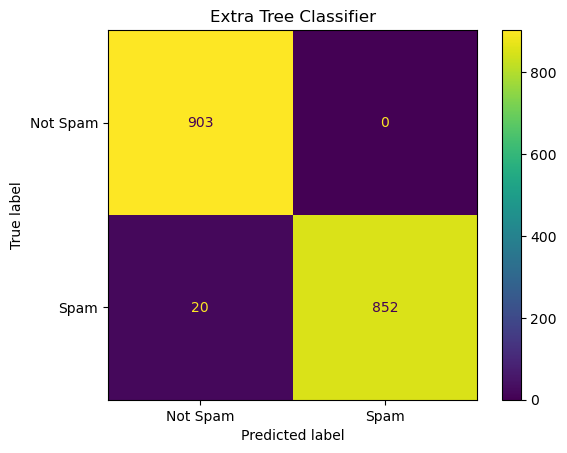

In [661]:
classifier = ExtraTreesClassifier(n_estimators=50, random_state=2).fit(X_train, y_train)
ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, display_labels = ['Not Spam', 'Spam'])
plt.title('Extra Tree Classifier')
plt.show()

In [377]:
import pickle
pickle.dump(tfidf, open('tfidf_vectorizer.pkl', 'wb'))
pickle.dump(etc, open('model_new.pkl', 'wb'))